In [19]:
import pandas as pd
import math

# Create the dataframe
df = pd.read_csv('mcu_data.csv', skiprows=1)  # Change to cloud if time permits
df

,Title,Year,Actor,US Box Office,International Revenue,Adjusted Revenue,Average Rating,IMDb Rating,Metacritic
0,Iron Man,2008,Robert Downey Jr.,"$319,034,126","$585,796,247","$738,435,213",79.0%,7.9 / 10,79%
1,The Incredible Hulk,2008,Edward Norton,"$134,806,913","$264,770,996","$333,761,488",64.0%,6.7 / 10,61%
2,Iron Man 2,2010,Robert Downey Jr.,"$312,433,331","$623,933,331","$776,412,224",63.5%,7.0 / 10,57%
3,Thor,2011,Chris Hemsworth,"$181,030,624","$449,326,618","$542,228,742",63.5%,7 / 10,57%
4,Captain America: The First Avenger,2011,Chris Evans,"$176,654,505","$370,569,774","$447,188,247",67.5%,6.9 / 10,66%
5,The Avengers,2012,Robert Downey Jr.,"$623,357,910","$1,518,815,515","$1,795,324,611",74.5%,8.0 / 10,69%
6,Iron Man 3,2013,Robert Downey Jr.,"$409,013,994","$1,214,811,252","$1,415,020,488",66.5%,7.1 / 10,62%
7,Thor: The Dark World,2013,Chris Hemsworth,"$206,362,140","$644,783,140","$751,047,829",61.5%,6.9 / 10,54%
8,Captain America: The Winter Soldier,2014,Chris Evans,"$259,766,572","$714,421,503","$819,155,031",73.5%,7.7 / 10,70%
9,Guardians of the Galaxy,2014,Chris Pratt,"$333,718,600","$773,350,147","$886,722,560",78.0%,8.0 / 10,76%


In [20]:
# Turn 'International Revenue', 'Adjusted Revenue', and 'Average Rating' values from strings into floats for mathematics
df['International Revenue'] = df['International Revenue'].apply(lambda x: 1 if x == 'No Data' else float(x.replace(',', '').replace('$', '').replace(' (est.)', '')))
df['Adjusted Revenue'] = df['Adjusted Revenue'].apply(lambda x:  1 if x == 'No Data'  else float(x.replace(',', '').replace('$','')))
df['Average Rating'] = df['Average Rating'].apply(lambda x: float(x.replace('%', '')))



In [21]:
# Calculate the Mean and Median for 'International Revenue' and 'Adjusted Revenue'
columns = ['International Revenue', 'Adjusted Revenue']
for column in columns:    
    # Calculate the Mean and Median
    mean = df[column].mean()
    mean = "${:,.0f}".format(mean)
    median = df[column].median()
    median = "${:,.0f}".format(median)
    
    # Print the Results
    print(f'The {column} has:')
    print(f'        A Mean of: {mean}')
    print(f'        A Median of: {median}')


The International Revenue has:
        A Mean of: $879,053,949
        A Median of: $743,885,825
The Adjusted Revenue has:
        A Mean of: $985,880,283
        A Median of: $852,938,796


In [22]:
# Calculate the Mean, Median, and Mode of 'Average Rating'
column = 'Average Rating'
mean = df[column].mean()
median = df[column].median()
median = "{:,.0f}%".format(median)
mode = df[column].mode().iloc[0]
mode = "{:,.0f}%".format(mode)

# Calculate the Standard Deviation of 'Average Rating' 
df['Calculations'] = df['Average Rating'].apply(lambda x: (x - mean)*(x - mean))
total = df['Calculations'].sum()
variance = total / len(df)
standard_deviation = math.sqrt(variance)

# Format the results
df = df.drop('Calculations', axis=1)
mean = "{:,.2f}%".format(mean)
standard_deviation = "{:,.2f}%".format(standard_deviation)

# Print the Results
print(f'The {column} has:')
print(f'        A Mean of: {mean}')
print(f'        A Median of: {median}')
print(f'        A Mode of: {mode}')
print(f'        A Standard Deviation of: {standard_deviation}')

The Average Rating has:
        A Mean of: 70.94%
        A Median of: 72%
        A Mode of: 74%
        A Standard Deviation of: 6.29%


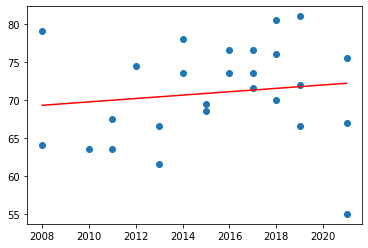

In [23]:
import matplotlib.pyplot as plt
import numpy as np

# Create the Plot
x = df['Year'].tolist()
y = df['Average Rating'].tolist()
plt.scatter(x, y)

# Create the Trendline
z = np.polyfit(x, y, 1)
p = np.poly1d(z)
plt.plot(x,p(x), color = 'red')

plt.show()

In [24]:
# Calculate the mode of 'Actor' to satisfy qualitative requirement
mode = df['Actor'].mode().iloc[0]
size = len(df.loc[df['Actor'] == mode])
print(f'The most common lead actor is: {mode}')
print(f'Total Number of films: {size}')

The most common lead actor is: Robert Downey Jr.
Total Number of films: 7


The highest rated lead actor is Chadwick Boseman, with an average rating of 80.5% per film
Who made 1 films from 2018 to 2018


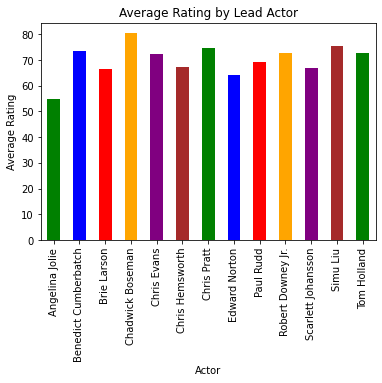

In [25]:
# Determine the best actor
# Graph the data
ActorRatings = df.groupby('Actor')['Average Rating'].mean()
ActorRatings.plot.bar(color=['green', 'blue', 'red', 'orange', 'purple', 'brown'], ylabel='Average Rating', title='Average Rating by Lead Actor')

# Find the primary data
highest = 0
for actor in ActorRatings.keys():
    if ActorRatings[actor] > highest:
        highest = ActorRatings[actor]
        top_actor = actor

# Find the secondary data
size = len(df.loc[df['Actor'] == top_actor])
first = 99999
last = 0
for index, row in df.iterrows():
    if df.Actor[index] == top_actor:
        if df.Year[index] < first:
            first = df.Year[index]
        if df.Year[index] > last:
            last = df.Year[index]

# Print the Results
print(f'The highest rated lead actor is {top_actor}, with an average rating of {highest}% per film')
print(f'Who made {size} films from {first} to {last}')

The franchise has made: $22,855,402,681
Robert Downey Jr. made the largest amount: $10,192,026,967
With 7 films taking in 44.59% of the total revenue


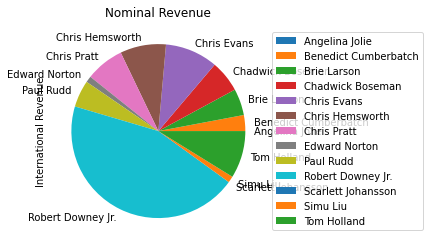

In [26]:
# Find which actor made the most money 
#Create the graph using groupby
ActorRevenue = df.groupby('Actor')['International Revenue'].sum()
ActorRevenue.plot.pie(legend=True, title='Nominal Revenue').legend(loc='center left', bbox_to_anchor=(1.0, 0.5))

# Find the relevant data
highest = 0
for actor in ActorRevenue.keys():
    if ActorRevenue[actor] > highest:
        highest = ActorRevenue[actor]
        top_actor = actor
total = df['International Revenue'].sum()
size = len(df.loc[df['Actor'] == top_actor])
percent = (highest / total) * 100

# Format the data
total = "${:,.0f}".format(total)
highest = "${:,.0f}".format(highest)
percent = "{:,.2f}%".format(percent)

# Print the results
print(f'The franchise has made: {total}')
print(f'{top_actor} made the largest amount: {highest}')
print(f'With {size} films taking in {percent} of the total revenue')

The franchise has made: $25,632,887,350 (Inflation Adjusted)
Robert Downey Jr. made the largest amount: $11,514,842,687
With 7 films taking in 44.92% of the total revenue


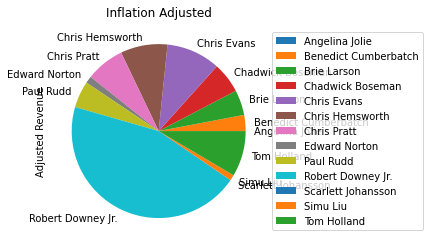

In [27]:
# Find which actor made the most money (inflation adjusted)
#Create the graph using groupby
ActorAdjusted = df.groupby('Actor')['Adjusted Revenue'].sum()
ActorAdjusted.plot.pie(legend=True, title='Inflation Adjusted').legend(loc='center left', bbox_to_anchor=(1.0, 0.5))

# Find the relevant data
highest = 0
for actor in ActorAdjusted.keys():
    if ActorAdjusted[actor] > highest:
        highest = ActorAdjusted[actor]
        top_actor = actor
total = df['Adjusted Revenue'].sum()
size = len(df.loc[df['Actor'] == top_actor])
percent = (highest / total) * 100

# Format the data
total = "${:,.0f}".format(total)
highest = "${:,.0f}".format(highest)
percent = "{:,.2f}%".format(percent)



# Print the results
print(f'The franchise has made: {total} (Inflation Adjusted)')
print(f'{top_actor} made the largest amount: {highest}')
print(f'With {size} films taking in {percent} of the total revenue')